### Downloading the Data

In [1]:
# Importing the required libraries
import os
import tarfile
import urllib.request

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
# Function to create a directory for the dataset and download and extract
def fetchHousingData(housingURL=HOUSING_URL, housingPath=HOUSING_PATH):
    os.makedirs(housingPath, exist_ok=True) # exist_ok=True means is already
                                            # exists then file remains unaltered
                                            # if False then OSError raised
    tgzPath = os.path.join(housingPath, "housing.tgz")
    urllib.request.urlretrieve(housingURL, tgzPath)
    housing_tgz = tarfile.open(tgzPath)
    housing_tgz.extractall(path=housingPath)
    housing_tgz.close()
# end function fetchHosuingData()

In [4]:
# Fetching and downloading the data by calling the above defined function
fetchHousingData()

In [5]:
# Loading the data using pandas
import pandas as pd

In [6]:
# Function to load data and return a pandas DataFrame object
def loadHousingData(housingPath=HOUSING_PATH):
    csvPath = os.path.join(HOUSING_PATH, "housing.csv")

    return pd.read_csv(csvPath)
# end function loadHosuingData()

### Quick Look at the Data Structure

In [7]:
housingDF = loadHousingData() # function call
housingDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Seeing the overall description of the table/data
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Determining the categories in ocean_proximity coloumn and counting the number
# of districts in each
housingDF["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
# Summary of the numerical attributes
housingDF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Have a visualisation of the data structure using histograms

In [11]:
# Set-up to plot pretty figures
# only for Jupyter Notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14, titlecolor="w", labelcolor="w")
mpl.rc("xtick", labelsize=12, c="w")
mpl.rc("ytick", labelsize=12, c="w")
# mpl.rc("axislabel", c="w")
# mpl.rc("xlabel", c="w")

In [12]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

# Function to save the figures
def saveFigures(figID, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, figID + "." + fig_extension)
    print("Saving the figure...", figID)

    if tight_layout:
        plt.tight_layout()

    plt.savefig(path, format=fig_extension, dpi=resolution)
# end function saveFigures()

Saving the figure... all_attributes_histograms


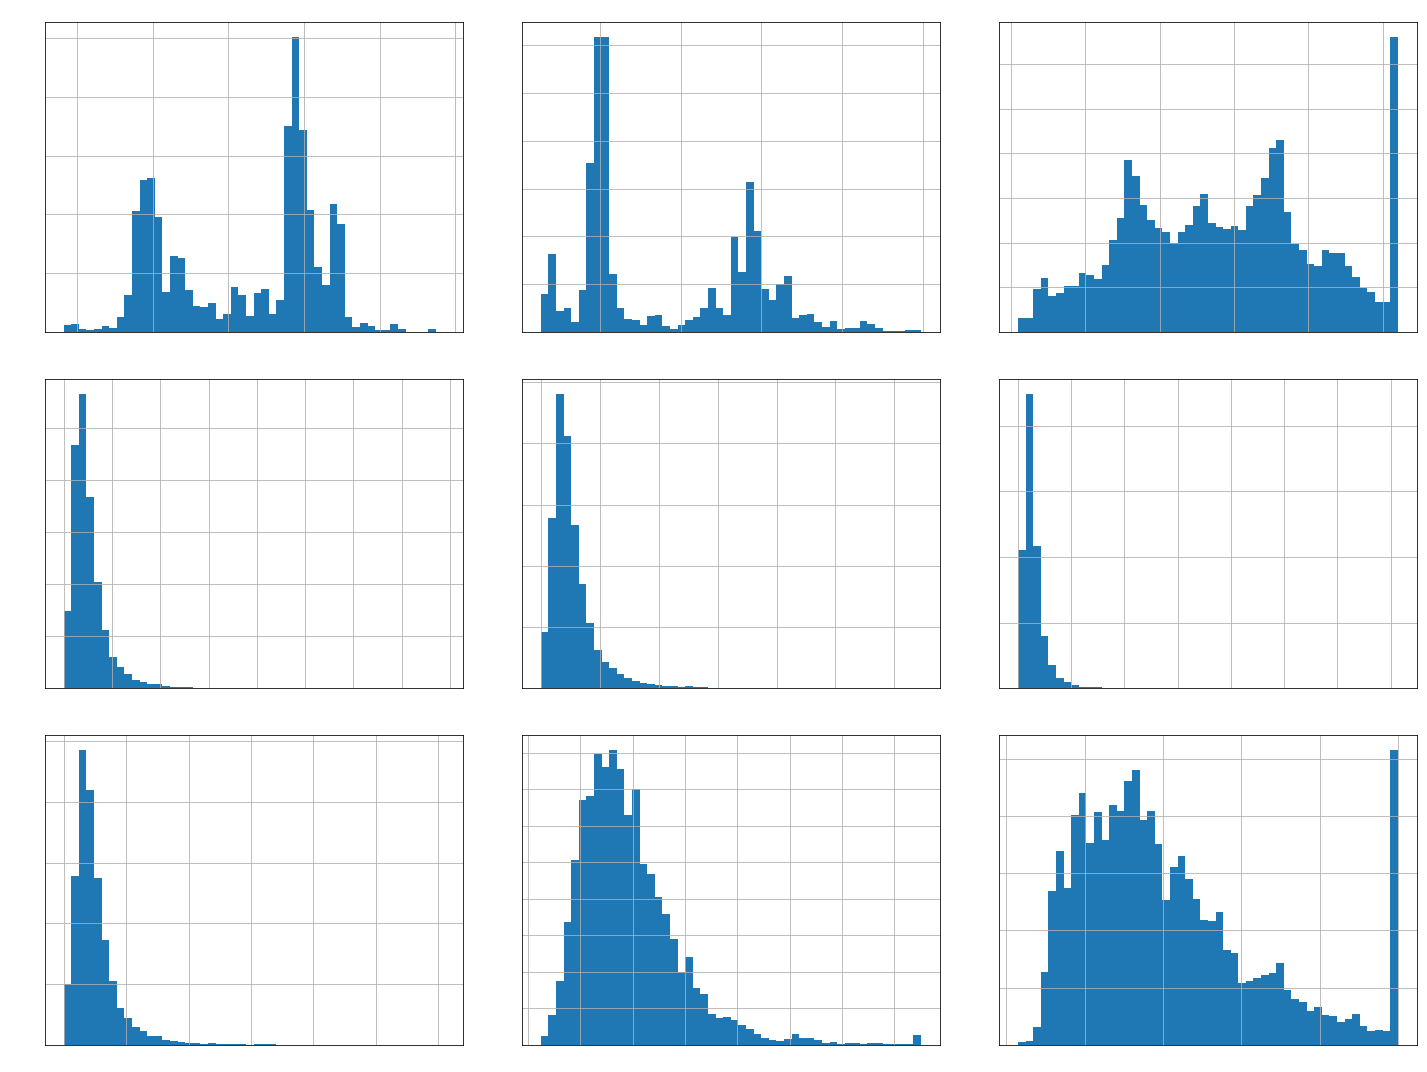

In [13]:
# Visualising the data with histograms
housingDF.hist(bins=50, figsize=(20, 15))
# Saving the figures
saveFigures("all_attributes_histograms")
plt.show()

### Create a Test Set

In [14]:
# For illustrations only as Sklearn has a function that splits the data into
# training and test sets.
import numpy as np

# Function to split the data into train and test sets
def splitTrainTest(dataFrame, testRatio):
    np.random.seed(42) # to make the output identical in every run
    shuffledIndices = np.random.permutation(len(dataFrame))
    testSetSize = int(len(dataFrame) * testRatio)
    testIndices = shuffledIndices[: testSetSize]
    trainIndices = shuffledIndices[testSetSize: ]

    return dataFrame.iloc[trainIndices], dataFrame.iloc[testIndices]
# end function splitTrainTest()

In [15]:
trainSet, testSet = splitTrainTest(housingDF, 0.2)
print("The train set length =", len(trainSet))
print("The test set length =", len(testSet))

The train set length = 16512
The test set length = 4128


In [16]:
testSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [17]:
# For illustrations: using hash method
from zlib import crc32

# Function to make sure the test set contains instances with hashes less than
# 20% of the maximum hash
def testSetCheck(identifier, testRatio):
    return crc32(np.int64(identifier)) & 0xffffffff < (testRatio * 2**32)
# end function testSetCheck()

# Function to split the dataset
def splitTrainTest_byID(dataFrame, testRatio, id_coloumn):
    ids = dataFrame[id_coloumn]
    inTestSet = ids.apply(lambda id_: testSetCheck(id_, testRatio))

    return dataFrame.loc[~inTestSet], dataFrame.loc[inTestSet]
# end function splitTrainTest_byID()

In [18]:
# As the housing dataset does not have a identifier, we use the row index
housingWithID = housingDF.reset_index() # adds an 'index' column
trainSet, testSet = splitTrainTest_byID(housingWithID, 0.2, "index")

print("The train set length =", len(trainSet))
print("The test set length =", len(testSet))

The train set length = 16512
The test set length = 4128


In [19]:
testSet.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [20]:
# If using the row index as the identifier is not possible, then build
# an identifier using two or more attributes
# For housing dataset, latitudes and longitudes are stable for millions of years
# So can use them to create an identifier
housingWithID["id"] = housingDF["longitude"] * 1000 + housingDF["latitude"]

trainSet, testSet = splitTrainTest_byID(housingWithID, 0.2, "id")
print("The train set length =", len(trainSet))
print("The test set length =", len(testSet))

testSet.head()

The train set length = 16322
The test set length = 4318


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


We can see that the set length is unidentical to the previous formed sets.
This is because many districts have the exact same ID, so they ended up
in the same set (train or test). This introduced some unfortunate sampling bias.

In [21]:
# Using the function from Sklearn package to split the dataset
from sklearn.model_selection import train_test_split

# random_state parameter is the random seed to keep the output same
trainSet, testSet = train_test_split(housingDF, test_size=0.2, random_state=42)

print("The train set length =", len(trainSet))
print("The test set length =", len(testSet))

The train set length = 16512
The test set length = 4128


In [22]:
testSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


We see that train_test_split() method from sklearn has the same working as the
user-defined function splitTrainTest(); only with additional features

Saving the figure... median_income


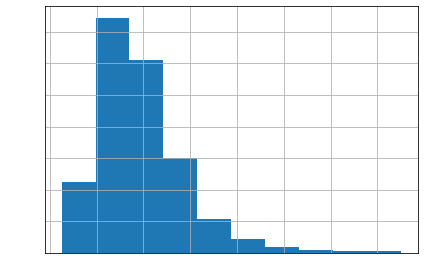

In [23]:
# SUPPOSE median income is an important attribute in determining the median
# house prices. So let's look at its histogram more closely.
housingDF["median_income"].hist()
saveFigures("median_income")
plt.show()

The values are clustered around 1.5 to 6. But some go well beyond 6.
So need to create an income category attribute - will make the data
representative of the various income categories.

In [24]:
# Category 1 is from 0 to 1.5, Category 2 ranges from 1.5 to 3, and so on...
housingDF["income_category"] = pd.cut(housingDF["median_income"],
                                      bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                      labels=[1, 2, 3, 4, 5])

In [25]:
housingDF["income_category"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

Saving the figure... income_category


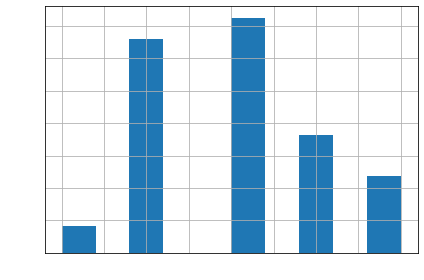

In [26]:
housingDF["income_category"].hist()
saveFigures("income_category")
plt.show()

In [27]:
# Doing stratified sampling based on the income category.
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_i, test_i in split.split(housingDF, housingDF["income_category"]):
    stratTrainSet = housingDF.loc[train_i]
    stratTestSet = housingDF.loc[test_i]
# end for

In [28]:
# Checking if it worked properly
stratTestSet["income_category"].value_counts() / len(stratTestSet)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [29]:
# Function to see the proportions of the data
def incomeCategoryProportions(dataFrame):
    return dataFrame["income_category"].value_counts() / len(dataFrame)
# end function incomeCategoryProportions()

trainSet_2, testSet_2 = train_test_split(housingDF, test_size=0.2,
                                         random_state=42)

compareProportions = pd.DataFrame({
    "Overall": incomeCategoryProportions(housingDF),
    "Stratified": incomeCategoryProportions(stratTestSet),
    "Random": incomeCategoryProportions(testSet_2),
}).sort_index()

pE1 = 100 * compareProportions["Random"] / compareProportions["Overall"] - 100
pE2 = 100 * compareProportions["Stratified"] / compareProportions["Overall"] - 100
compareProportions["Rand. %error"] = pE1
compareProportions["Strat. %error"] = pE2

In [30]:
# Creating the figure
compareProportions

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [31]:
# Now deleting the income_category column and getting the original dataframe
for set_ in (stratTrainSet, stratTestSet):
    set_.drop("income_category", axis=1, inplace=True)
# end for

In [32]:
stratTrainSet.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


### Gaining Insights

In [33]:
# Creating a copy of the training set to play with
trainDF = stratTrainSet.copy()

##### Visualising Geographical Data

Saving the figure... geographical_scatterplot_of_data


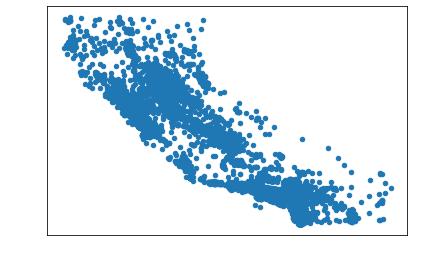

In [34]:
# Longitude and Latitude
# Scatterplot of all districts to viualise the data
trainDF.plot(kind="scatter", x="longitude", y="latitude")
saveFigures("geographical_scatterplot_of_data")

Saving the figure... high_density_points


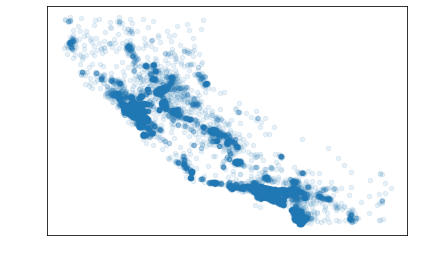

In [35]:
# Setting alpha to 0.1 makes it easier to visualise the high density points
trainDF.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
saveFigures("high_density_points")

Saving the figure... housing_prices_with_cmap


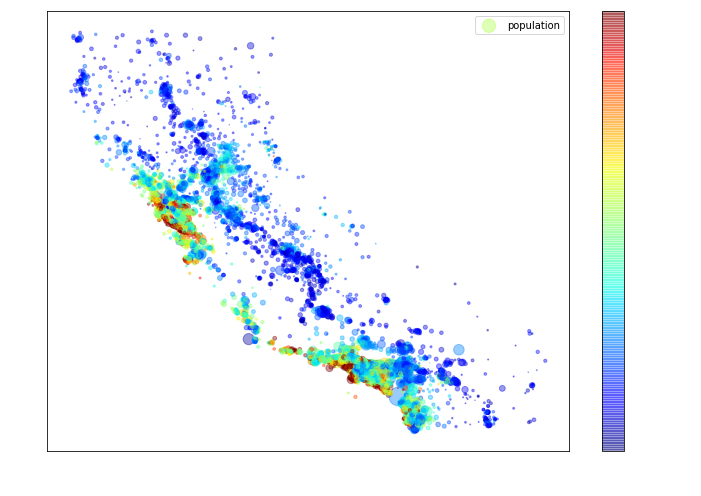

In [36]:
# Housing prices
# parameter s -> radius of the circle -> district's population
# parameter c -> colour -> price
# parameter cmap -> pre-defined colour map called jet - ranging from blue
# (low prices) to red (high prices)
# The argument sharex=False fixes a display bug (the x-axis values and legend
# were not displayed). This is a temporary fix.
trainDF.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=trainDF["population"] / 100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, sharex=False)
saveFigures("housing_prices_with_cmap")
plt.legend()

##### Looking for Correlations

In [37]:
# Finding the Pearson's r for every variable against median house value
corrMatrix = trainDF.corr()

In [38]:
corrMatrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Clearly, we see that median income is the most linearly realted to the median
house value
Now, using pandas scatter_matrix() method to plot the correlations that we need

Saving the figure... scatter_matrix_plot_pearsons_r


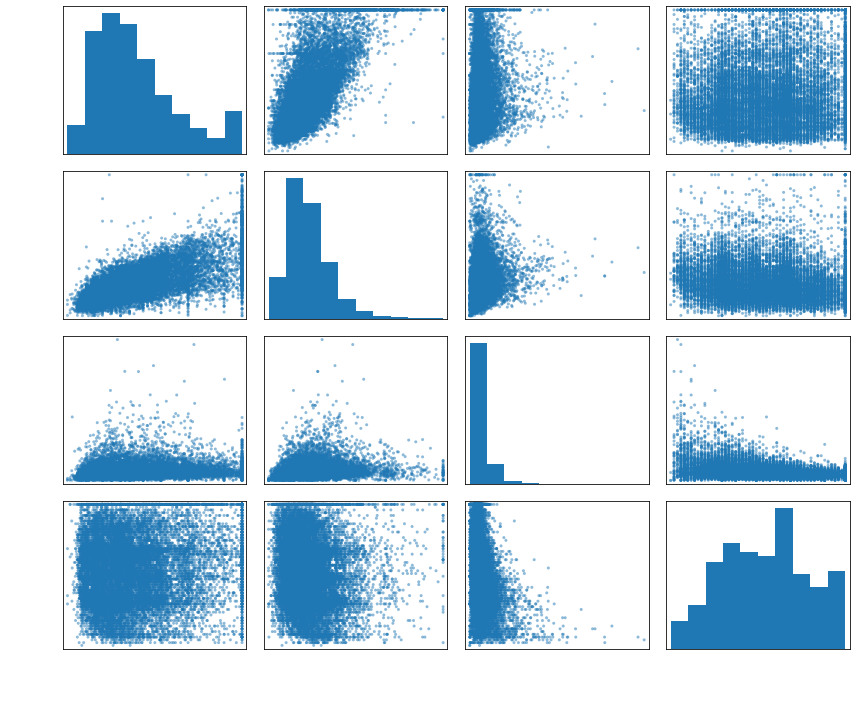

In [39]:
from pandas.plotting import scatter_matrix

promisingAttributes = ["median_house_value", "median_income", "total_rooms",
                       "housing_median_age"]
scatter_matrix(trainDF[promisingAttributes], figsize=(12, 10))
saveFigures("scatter_matrix_plot_pearsons_r")

The most promising attribute here, we see, is the median income. Having a
closer look at the scatter plot

Saving the figure... correlation_with_median_income


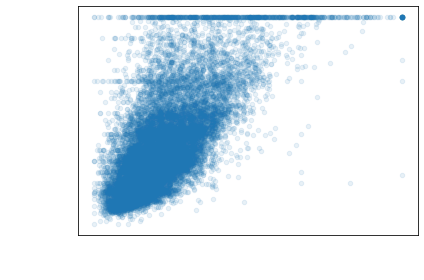

In [40]:
trainDF.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
saveFigures("correlation_with_median_income")

Observations:
- Correlation is indeed very strong
- Price cap at 5 is clearly visible
- A horizontal line around 4.5
- Another around 3.5
- More aound 2.8 and below that

Need to remove those districts with those horizontal lines to prevent the algos
from learning to reproduce these data quirks

##### Experimenting with Attribute Combinations

In [41]:
# Creating three new attributes - rooms per household, bedrooms per room, and
# population per household
trainDF["rooms_per_household"] = trainDF["total_rooms"] / trainDF["households"]
trainDF["bedrooms_per_room"]=trainDF["total_bedrooms"] / trainDF["total_rooms"]
trainDF["population_per_household"]=trainDF["population"]/trainDF["households"]

In [42]:
# Creating the correlation matrix again with the new attributes
corrMatrix = trainDF.corr()
corrMatrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Saving the figure... scatter_matrix_plot_pearsons_r_combined_attributes


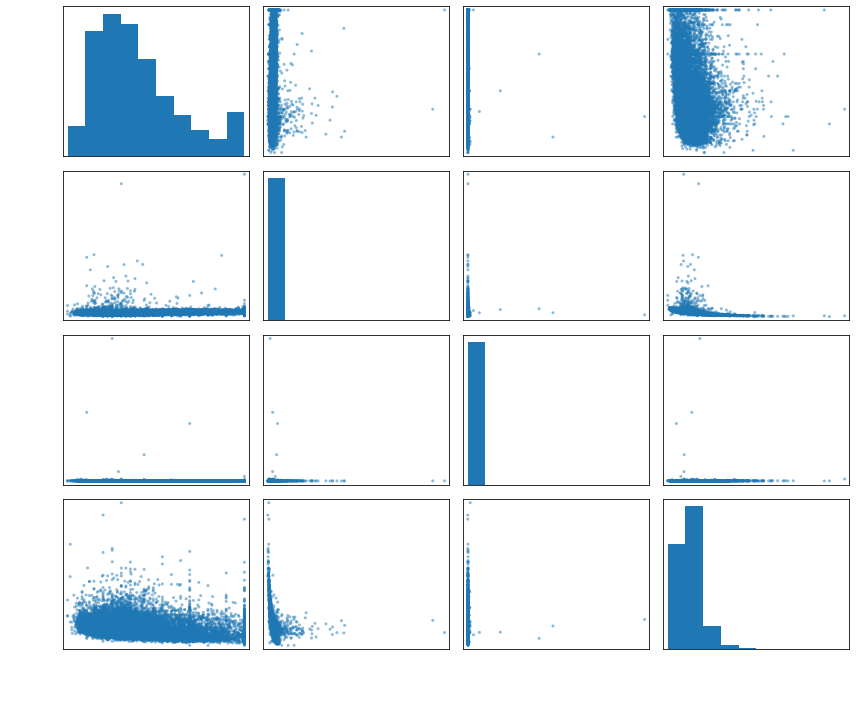

In [43]:
# Creating a scatter plot to have a better idea
reqAttributes = ["median_house_value", "rooms_per_household",
                 "population_per_household", "bedrooms_per_room"]
scatter_matrix(trainDF[reqAttributes], figsize=(12, 10))
saveFigures("scatter_matrix_plot_pearsons_r_combined_attributes")

The bedrooms per room is more linearly correlated to the median house value than
the number of bedrooms or rooms individually. Similarly, the rooms per
household is also more correlated to the target value.

Let's have a closer look at the bedrooms per rooms and rooms per household
scatter plots

Saving the figure... bedrooms_per_room_correlation_with_median_income


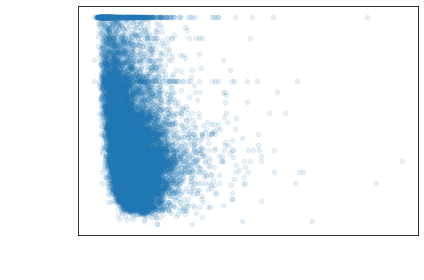

In [44]:
trainDF.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value",
             alpha=0.1)
saveFigures("bedrooms_per_room_correlation_with_median_income")

Saving the figure... rooms_per_household_correlation_with_median_income


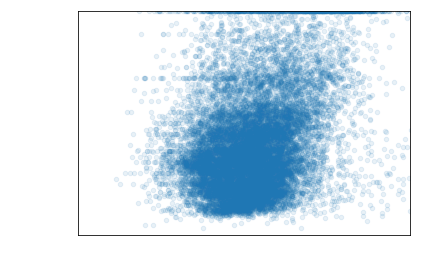

In [45]:
trainDF.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.1)
plt.axis([0, 10, 0, 500000])
saveFigures("rooms_per_household_correlation_with_median_income")

### Preparing the Data for ML Algorithms

In [46]:
# Separating the labels from the predictors as same transformations to both is
# not required
trainDF = stratTrainSet.drop("median_house_value", axis=1)
trainDFLabels = stratTrainSet["median_house_value"].copy()

In [47]:
trainDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [48]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [49]:
trainDFLabels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [50]:
trainDFLabels.describe()

count     16512.000000
mean     206990.920724
std      115703.014830
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

##### Data Cleaning

In [51]:
# Demonstrating the handling of the missing features using three options - three
# methods for DataFrames: dropna(), drop(), and fillna()
sampleIncompleteRows = trainDF[trainDF.isnull().any(axis=1)].head(10)
sampleIncompleteRows # keeping the rows containing at least 1 null value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,NEAR OCEAN
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
4496,-118.22,34.05,34.0,1113.0,NaN,928.0,290.0,3.1654,<1H OCEAN
16879,-122.39,37.60,34.0,707.0,NaN,381.0,156.0,4.3750,NEAR OCEAN
2412,-119.45,36.61,24.0,1302.0,NaN,693.0,243.0,3.7917,INLAND


In [52]:
# Option 1: Getting rid of the null-value-containing-rows
newDF = sampleIncompleteRows.dropna(subset=["total_bedrooms"])
newDF # the method returns a new data frame with the null value rows removed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [53]:
# Option 2: Getting rid of the entire attribute that contains null values
newDF = sampleIncompleteRows.drop("total_bedrooms", axis=1)
newDF

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN
20267,-119.19,34.20,18.0,3620.0,3171.0,779.0,3.3409,NEAR OCEAN
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
4496,-118.22,34.05,34.0,1113.0,928.0,290.0,3.1654,<1H OCEAN
16879,-122.39,37.60,34.0,707.0,381.0,156.0,4.3750,NEAR OCEAN
2412,-119.45,36.61,24.0,1302.0,693.0,243.0,3.7917,INLAND


In [54]:
# Option  3: Setting the null values to a sensible value such as zero, or mean,
# or median, etc.
## DON'T FOPRGET TO SAVE THE MEDIAN VALUE COMPUTED.
# Will be required later to replace the missing values in the test set and also
# once the system goes live to replace the missing values in the new data set.
median = trainDF["total_bedrooms"].median()
sampleIncompleteRows["total_bedrooms"].fillna(median, inplace=True)
sampleIncompleteRows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN
20267,-119.19,34.20,18.0,3620.0,433.0,3171.0,779.0,3.3409,NEAR OCEAN
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
4496,-118.22,34.05,34.0,1113.0,433.0,928.0,290.0,3.1654,<1H OCEAN
16879,-122.39,37.60,34.0,707.0,433.0,381.0,156.0,4.3750,NEAR OCEAN
2412,-119.45,36.61,24.0,1302.0,433.0,693.0,243.0,3.7917,INLAND


In [55]:
# Now using Scikit-learn's imputer class to take care of the missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [56]:
# Median can only be computed for attributes having only numerical value.
# So need to create a copy  of data without the text attribute - ocean_proximity
trainDF_num = trainDF.drop("ocean_proximity", axis=1)
trainDF_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [57]:
# Fitting the imputer instane to the training data using the fit() method
imputer.fit(trainDF_num)

SimpleImputer(strategy='median')

In [58]:
# imputer computes the median of each attribute and stores it in statistics_
# instance variable
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [59]:
# Checking with the median method to compute the median of the set
trainDF_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [60]:
# Using the "trained" imputer to transform the training set by replacing the
# missing values with the learned medians
X = imputer.transform(trainDF_num) # plain NumPy array

# Putting the transformations array back into the DataFrame
trainDF_tr = pd.DataFrame(X, columns=trainDF_num.columns,
                          index=trainDF_num.index)

trainDF_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [61]:
trainDF_tr.loc[sampleIncompleteRows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662
20267,-119.19,34.20,18.0,3620.0,433.0,3171.0,779.0,3.3409
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
4496,-118.22,34.05,34.0,1113.0,433.0,928.0,290.0,3.1654
16879,-122.39,37.60,34.0,707.0,433.0,381.0,156.0,4.3750
2412,-119.45,36.61,24.0,1302.0,433.0,693.0,243.0,3.7917


##### Handling Text and Categorical Attributes

In [62]:
trainDF_cat = trainDF[["ocean_proximity"]]

# Looking at the first 10 values of the only text attribute in the dataset
trainDF_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [63]:
# Converting the text attributes to numerical representation
from sklearn.preprocessing import OrdinalEncoder

ordinalEncoder = OrdinalEncoder()
trainDF_cat_encoded = ordinalEncoder.fit_transform(trainDF_cat)
trainDF_cat_encoded[: 10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [64]:
# <1H OCEAM -> 0, INLAND -> 1, ISLAND -> 2, and so on...
ordinalEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
# Using one-hot encoding for the categorical attribute
from sklearn.preprocessing import OneHotEncoder

catEncoder = OneHotEncoder()
trainDF_cat_1hot_encoded = catEncoder.fit_transform(trainDF_cat)
trainDF_cat_1hot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [66]:
# Converting the sparse matrix (majority zeros) to dense array (normal arrays)
trainDF_cat_1hot_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [67]:
# Checking for the 3rd index value with the category encoded array
trainDF_cat_1hot_encoded.toarray()[3]

array([0., 1., 0., 0., 0.])

In [68]:
catEncoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

##### Custom Transformers

In [69]:
# Small transformer to add the combined attributes discussed earlier
from sklearn.base import BaseEstimator, TransformerMixin

# Column indices (declaring explicitly)
# roomsIndx, bedroomsIndx, populationIndx, householdsIndx = 3, 4, 5, 6

# Getting the indices dynamically
colsReq = "total_rooms", "total_bedrooms", "population", "households"
roomsIndx, bedroomsIndx, populationIndx, householdsIndx = [
    trainDF.columns.get_loc(c) for c in colsReq
]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, addBedroomsPerRoom=True): # no *args and no **kargs
        self.addBedroomsPerRoom = addBedroomsPerRoom
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        roomsPerHousehold = X[:, roomsIndx] / X[:, householdsIndx]
        populationPerHousehold = X[:, populationIndx] / X[:, householdsIndx]

        if self.addBedroomsPerRoom:
            bedroomsPerRoom = X[:, bedroomsIndx] / X[:, roomsIndx]
            return np.c_[X, roomsPerHousehold, populationPerHousehold,
                         bedroomsPerRoom]
        else:
            return np.c_[X, roomsPerHousehold, populationPerHousehold]
# end class CombinedAttributesAdder

In [70]:
# Creating an instance to add attributes
attributeAdder = CombinedAttributesAdder(addBedroomsPerRoom=False)
trainDF_extraCats = attributeAdder.transform(trainDF.values)
trainDF_extraCats

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

`trainDF_extraCats` is a NumPy array => lost all columns (demerit of scikit-learn)
To recover the columns:

In [71]:
def convertArrayToDF(numPyArray):
    dataFrame = pd.DataFrame(
        numPyArray,
        columns=list(trainDF)+["rooms_per_household", "population_per_household"],
        index=trainDF.index
    )

    return dataFrame
# end function convertArrayToDF()

trainDF_extraCats = convertArrayToDF(trainDF_extraCats) # function call

trainDF_extraCats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   longitude                 16512 non-null  object
 1   latitude                  16512 non-null  object
 2   housing_median_age        16512 non-null  object
 3   total_rooms               16512 non-null  object
 4   total_bedrooms            16354 non-null  object
 5   population                16512 non-null  object
 6   households                16512 non-null  object
 7   median_income             16512 non-null  object
 8   ocean_proximity           16512 non-null  object
 9   rooms_per_household       16512 non-null  object
 10  population_per_household  16512 non-null  object
dtypes: object(11)
memory usage: 2.0+ MB


In [72]:
trainDF_extraCats.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND,5.140351,2.540351
8879,-118.5,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN,8.061372,2.776173
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0,INLAND,5.442667,2.496
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN,4.257991,4.374429
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN,2.373272,12.396313


##### Feature Scaling - Transformation Pipelines

In [73]:
# To process numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numPipeline= Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attributesAdder', CombinedAttributesAdder()),
    ('stdScaler', StandardScaler()),
])

trainDF_num_tr = numPipeline.fit_transform(trainDF_num)

trainDF_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [74]:
# Converting the NumPy array to Pandas DataFrame
trainDF_num_tr = convertArrayToDF(trainDF_num_tr)

trainDF_num_tr.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928
19480,-0.696456,0.945009,-0.370047,0.143693,0.131447,0.025285,0.194138,-0.176435,-0.114867,-0.048003,-0.199264
8879,0.537433,-0.748168,1.856709,-0.182253,-0.528198,-0.583328,-0.585720,2.366702,1.003599,-0.027646,-1.097923
13685,1.166867,-0.696718,-0.210993,-0.272040,-0.586617,-0.433639,-0.324880,1.115239,0.000891,-0.051831,-1.073504
4937,0.657325,-0.771554,1.459074,-0.354345,-0.167949,0.444770,-0.157197,-1.076906,-0.452724,0.110319,0.545225
4861,0.647334,-0.757522,0.027588,-0.985660,-0.742400,1.138535,-0.745417,-1.772116,-1.174387,0.802788,3.534531


We see that the ocean_proximity attribute is categorical and is wrongly processed
We shall use `ColumnTransformer` to handle the numerical and categorical attributes
separately.

In [75]:
from sklearn.compose import ColumnTransformer

numAttributes = list(trainDF_num)
categoricalAttributes = ["ocean_proximity"]

fullPipeline = ColumnTransformer([
    ("num", numPipeline, numAttributes),
    ("cat", OneHotEncoder(), categoricalAttributes),
])

trainDF_final_prepared = fullPipeline.fit_transform(trainDF)

In [76]:
trainDF_final_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [77]:
trainDF_final_prepared.shape

(16512, 16)

The dimensions (columns) have increased as we used one-hot encoding

##### For reference, here is the old solution based on a DataFrameSelector transformer (to just select a subset of the Pandas DataFrame columns), and a FeatureUnion:

In [78]:
# Create a class to select numerical or categorical columns
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributeNames):
        self.attributeNames = attributeNames

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attributeNames].values
# end class OldDataFrameSelector

In [79]:
# Joining all these components into a big pipeline that will preprocess both the
# numerical and the categorical features
oldNumPipeline = Pipeline([
    ('selector', OldDataFrameSelector(numAttributes)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attributeAdder', CombinedAttributesAdder()),
    ('stdScaler', StandardScaler()),
])

oldCatPipeline = Pipeline([
    ('selector', OldDataFrameSelector(categoricalAttributes)),
    ('categoryEncoder', OneHotEncoder(sparse=False)),
])

In [80]:
from sklearn.pipeline import FeatureUnion

oldFullPipeline = FeatureUnion(transformer_list=[
        ('numPipeline', oldNumPipeline),
        ('catPipeline', oldCatPipeline),
    ])

In [81]:
oldHousingPrepared = oldFullPipeline.fit_transform(trainDF)

oldHousingPrepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [82]:
# To check if the result is the same as with the `ColumnTransformer`:
np.allclose(trainDF_final_prepared, oldHousingPrepared)

True

### Select and Train a Model

##### Training and Evaluating on the Training Set

In [83]:
# Let's try Linear Regression Model first
from sklearn.linear_model import LinearRegression

linRegModel = LinearRegression()
linRegModel.fit(trainDF_final_prepared, trainDFLabels)

LinearRegression()

In [84]:
# Trying the model on some instances
someData = trainDF.iloc[: 5]

# Preparing the data to be fed into the model
someDataPrepared = fullPipeline.transform(someData)

print("PREDICTIONS:", linRegModel.predict(someDataPrepared))

PREDICTIONS: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [85]:
# Checking with the actual corresponding labels
someLabels = trainDFLabels.iloc[: 5]

print("Actual Labels:", list(someLabels))

Actual Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [86]:
# Finding the model's rmse on the whole training set
from sklearn.metrics import mean_squared_error

trainDFPredictions = linRegModel.predict(trainDF_final_prepared)

linReg_rmse = mean_squared_error(trainDFLabels, trainDFPredictions,
                                 squared=False)

linReg_rmse

68628.19819848922

In [87]:
# Trying out DecisionsTrees
from sklearn.tree import DecisionTreeRegressor

treeRegModel = DecisionTreeRegressor()
treeRegModel.fit(trainDF_final_prepared, trainDFLabels)

DecisionTreeRegressor()

In [88]:
trainDFPredictions = treeRegModel.predict(trainDF_final_prepared)

treeReg_rmse = mean_squared_error(trainDFLabels, trainDFPredictions,
                                  squared=False)

treeReg_rmse

0.0

Clearly, an example of a badly overfitting model

##### Better Evaluation Using Cross-Validation

In [89]:
# Using Scikit-Learn's K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score

# For DecisionTree model
scores = cross_val_score(treeRegModel, trainDF_final_prepared, trainDFLabels,
                         scoring="neg_mean_squared_error", cv=10)

treeReg_rmseScores = np.sqrt(-(scores)) # negative because scoring function is
                                         # opposite of MSE

In [90]:
# Function to display the scores of the cross-validation training
def displayScores(scores):
    print("SCORES:", scores)
    print("MEAN:", scores.mean())
    print("STANDARD DEVIATION:", scores.std())
# end function displayScores()

In [91]:
# Looking at the results for the DecisionTree model
displayScores(treeReg_rmseScores)

SCORES: [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
MEAN: 70666.74616904806
STANDARD DEVIATION: 2928.322738055112


In [92]:
# Using cross-validation for LinearRegression as well
linReg_scores = cross_val_score(linRegModel, trainDF_final_prepared,
                                trainDFLabels, scoring="neg_mean_squared_error",
                                cv=10)

linReg_rmseScores = np.sqrt(-(linReg_scores))

In [93]:
# Looking at the result
displayScores(linReg_rmseScores)

SCORES: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
MEAN: 69052.46136345083
STANDARD DEVIATION: 2731.674001798347


DecisionTree model overfits badly and performs worse than LinearRegression

In [94]:
# Using RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor

ranForReg = RandomForestRegressor(n_estimators=100, random_state=42)
ranForReg.fit(trainDF_final_prepared, trainDFLabels)

RandomForestRegressor(random_state=42)

In [96]:
trainDFPredictions = ranForReg.predict(trainDF_final_prepared)
ranFor_rmse = mean_squared_error(trainDFLabels, trainDFPredictions,
                                 squared=False)
ranFor_rmse

18603.515021376355

In [97]:
ranForScores = cross_val_score(ranForReg, trainDF_final_prepared, trainDFLabels,
                               scoring="neg_mean_squared_error", cv=10)

ranFor_rmseScores = np.sqrt(-(ranForScores))
displayScores(ranFor_rmseScores)

SCORES: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
MEAN: 50182.303100336096
STANDARD DEVIATION: 2097.0810550985693
